In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Convolution2D
from tensorflow.keras.callbacks import ModelCheckpoint, History
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2
import os
import random

## 1. Load Data

In [2]:
train_dogs = ['dogs/' + i for i in os.listdir('dogs/') if 'dog' in i]
train_cats = ['cats/' + i for i in os.listdir('cats/') if 'cat' in i]

In [3]:
train_data = train_cats + train_dogs
train_data
random.shuffle(train_data)
del train_dogs
del train_cats

### 1.1. Visualzing some images

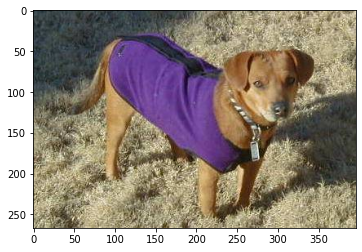

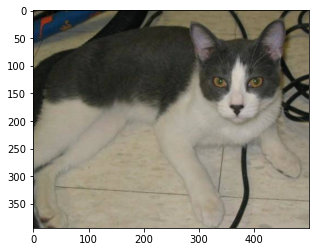

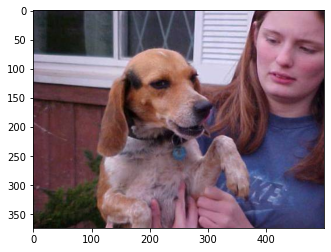

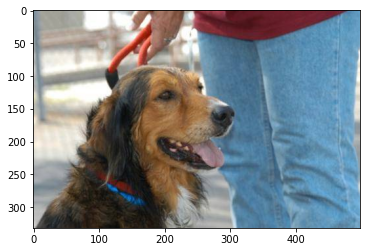

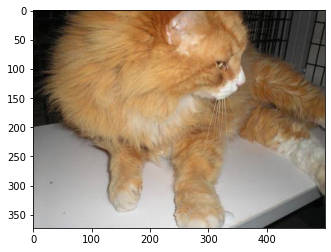

In [4]:
for image in train_data[:5]:
    img = mpimg.imread(image)
    plt.figure()
    plt.imshow(img)

### 1.2. Convert images and add labels to them

In [5]:
def process_images(list_of_images):
    x = []
    y = []
    
    for image in list_of_images:
        x.append(
            cv2.resize(
                cv2.imread(image, cv2.IMREAD_COLOR),
                (200, 200),
                interpolation=cv2.INTER_CUBIC
            )
        )
        
        if 'dog' in image:
            y.append(1)
        if 'cat' in image:
            y.append(0)
    
    return x, y

X, y = process_images(train_data)

## 2. Building Convloutional Network

### 2.1. Initializing the Network

In [6]:
model = Sequential()

model.add(Convolution2D(filters=32, activation='relu', kernel_size=2, padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=64, padding='same', kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=64, padding='same', kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=64, padding='same', kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))

model.add(Dropout(0.4))
model.add(Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))

model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        1

### 2.2. Split the data into train & validation sets

In [8]:
X_train, X_valid = np.array(X[0:7000]), np.array(X[7000:8000])
y_train, y_valid = np.array(y[0:7000]), np.array(y[7000:8000])

### 2.3. Train the model

In [9]:
history = History()
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, verbose=1, callbacks=[history], shuffle=True, batch_size=32)

Epoch 1/50
219/219 [==============================] - 207s 937ms/step - loss: 14.8074 - accuracy: 0.5077 - val_loss: 0.9800 - val_accuracy: 0.4980
Epoch 2/50
219/219 [==============================] - 209s 953ms/step - loss: 0.8647 - accuracy: 0.5081 - val_loss: 0.7177 - val_accuracy: 0.5250
Epoch 3/50
219/219 [==============================] - 216s 987ms/step - loss: 0.7429 - accuracy: 0.5425 - val_loss: 0.7176 - val_accuracy: 0.4860
Epoch 4/50
219/219 [==============================] - 210s 961ms/step - loss: 0.7267 - accuracy: 0.5688 - val_loss: 0.7027 - val_accuracy: 0.5300
Epoch 5/50
219/219 [==============================] - 216s 986ms/step - loss: 0.7030 - accuracy: 0.6065 - val_loss: 0.6709 - val_accuracy: 0.6860
Epoch 6/50
219/219 [==============================] - 218s 996ms/step - loss: 0.6672 - accuracy: 0.6545 - val_loss: 0.6371 - val_accuracy: 0.6960
Epoch 7/50
219/219 [==============================] - 216s 985ms/step - loss: 0.6243 - accuracy: 0.6953 - val_loss: 0.6661 

I trained the model with 50 epochs and saved the results of each ecpochs in history object. We can see each the accuracy of the trained and validation data are increasing over the epochs.

## 3. Apply on Test Data

### 3.1. Load the test data

In [20]:
test_dogs = ['test_set/dogs/' + i for i in os.listdir('test_set/dogs/') if 'dog' in i]
test_cats = ['test_set/cats/' + i for i in os.listdir('test_set/cats/') if 'cat' in i]

test_data = test_cats + test_dogs
test_data
random.shuffle(test_data)
del test_dogs
del test_cats

### 3.2. Processing and converting the images

In [21]:
X_test, y_test = process_images(test_data)
X_test = np.array(X_test)
y_test = np.array(y_test)

### 3.3. Evaluating the model

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)
score

63/63 [==============================] - 14s 227ms/step - loss: 0.6892 - accuracy: 0.8065


[0.6892260313034058, 0.8065000176429749]

### 3.4. Use the model to predict the classes for each image

In [23]:
pred_result = model.predict(X_test)

In [24]:
def pred(predictions):
    preds = []
    for i in predictions:
        if i >= 0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds
            
pred_result = pred(pred_result)

Using the function above to set the class equal to 1(Dog) if the result of sigmoid more than 0.5. And 0(Cat) if the result is less than 1.

### 3.5. Visualizing sample of the images along with its Actual classes & the Predicted classes

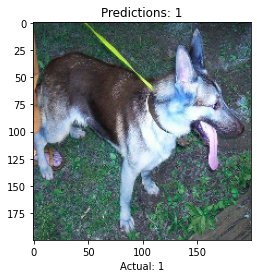

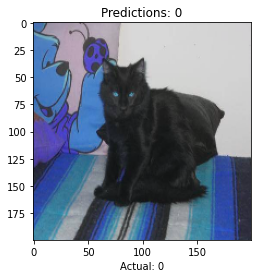

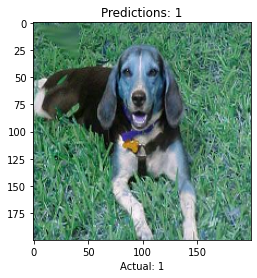

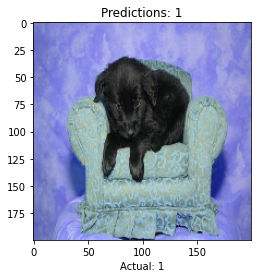

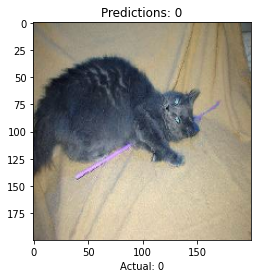

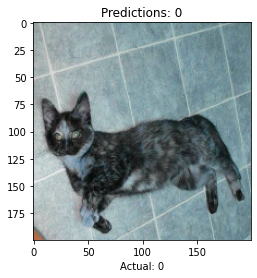

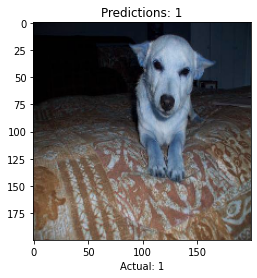

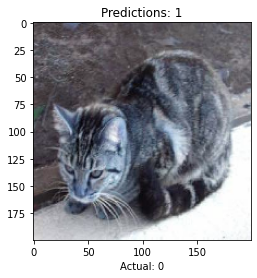

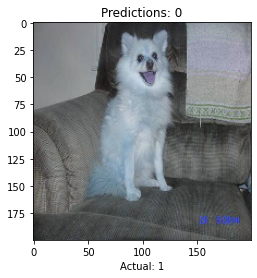

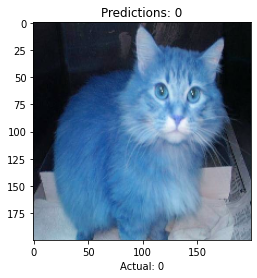

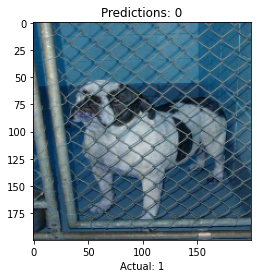

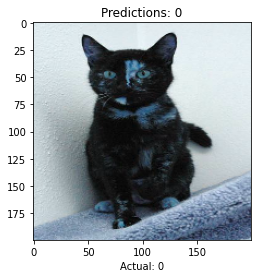

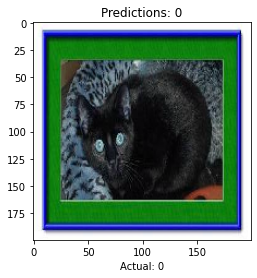

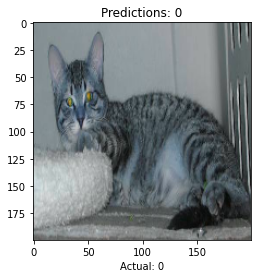

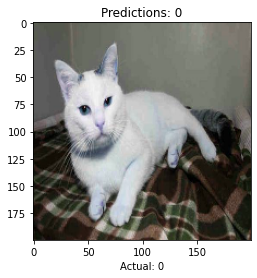

In [25]:
for i in range(15):
    plt.imshow(X_test[i])
    plt.xlabel("Actual: " + str(y_test[i]))
    plt.title("Predictions: " + str(pred_result[i]))
    plt.show()

<AxesSubplot:title={'center':'Training & Validation Accuracy'}>

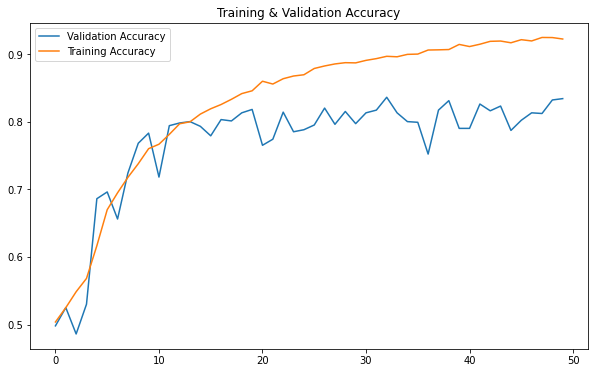

In [26]:
plt.figure(figsize=(10,6))
plt.title('Training & Validation Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], legend="full", label="Validation Accuracy")
sns.lineplot(x=history.epoch, y=history.history['accuracy'], legend="full", label="Training Accuracy")

<AxesSubplot:title={'center':'Training & Validation Loss'}>

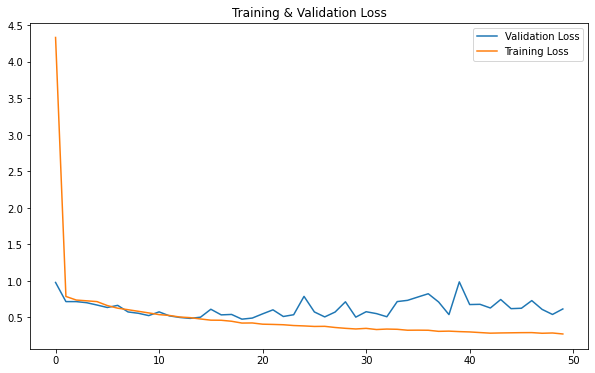

In [27]:
plt.figure(figsize=(10,6))
plt.title('Training & Validation Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], legend="full", label="Validation Loss")
sns.lineplot(x=history.epoch, y=history.history['loss'], legend="full", label="Training Loss")